<a href="https://colab.research.google.com/github/RITIK1442840127/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_2_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>



## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##**What is stock?**

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices of the bank since its inception. 
It contains the following features:

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

# **In this project, we will be solving this problem Using**
* linear regression
* random forest
* xgboost
* knn
* Auto-ARIMA 
* Facebook FbProphet 

than we'll compare their performances.



#What is Linear Regression?
The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:

Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn represent the weights.

#What is a Random Forest Regression?
It is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

#What is xgboost?
XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

#k-Nearest Neighbours
Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points.

# What is Auto-ARIMA?

Before training simple **ARIMA model** we have to figure out **p(AR), q(MA), d(Back Timeshift)** which is not as easy as fine-tuning other machine learning models and also we have to **reduce stationarity** and get those values which so time-consuming as well as boring.

**Auto-ARIMA** uses brute force and tries different combinations of p, q, and d and then returns the best model after evaluation. It uses mean squared error to evaluate the best model. It also uses Akaike Information Criteria (AIC) and Bayesian information criterion (BIC) which are statistical measures of goodness of fit and the simplicity of the model.

# What is FBProphet?

**Prophet, or “Facebook Prophet,”** is an open-source library for univariate (one variable) time series forecasting developed by **Facebook**.

**FBProphet** uses time as a regressor and tries to fit several linear and nonlinear function of time as components. By default, FBProphet will fit the data using a linear model but it can be changed to the nonlinear model (logistics growth) from its arguments.

**First, we import required libraries:**

**Pmdarima** is a statistical library designed to fill the void in Python's time series analysis capabilities. 

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing 'pmdarima'
!pip install pmdarima

In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

# **Reading the data**

The Dataset has Opening, Highest, Lowest and the Closing Prices of the Stock in every month. For this analysis,we select only Closing Stock Prices.

In [12]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

In [13]:
# print first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [14]:
# print last 5 rows of the dataset
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [15]:
# Getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# **Basic EDA and Data Preprocesing**



The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD.

Since, **Date** column has dtype as object we've to convert it into datetime format.

In [16]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [17]:
# setting date column as an index
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

In [18]:
# First 5 values
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [19]:
# Cheking for missing values
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

 The next single-line code will visualize the location of missing values.

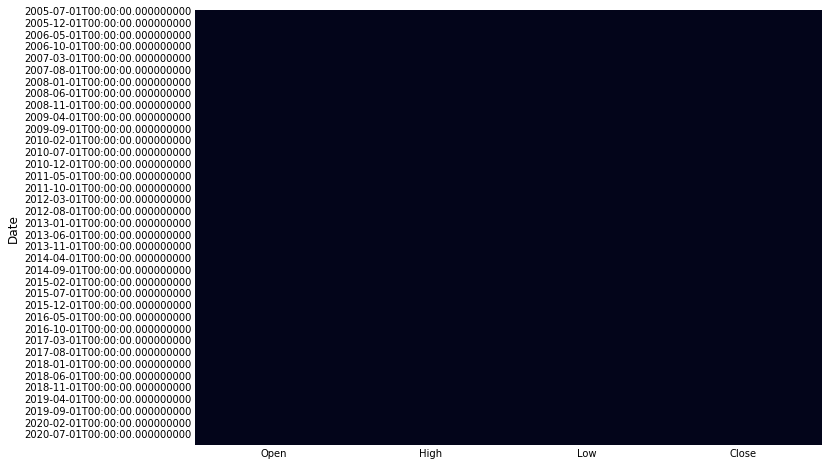

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, ax=ax)

As seen above we don't have any missing values and we're good to go....

# **Visualising the data**

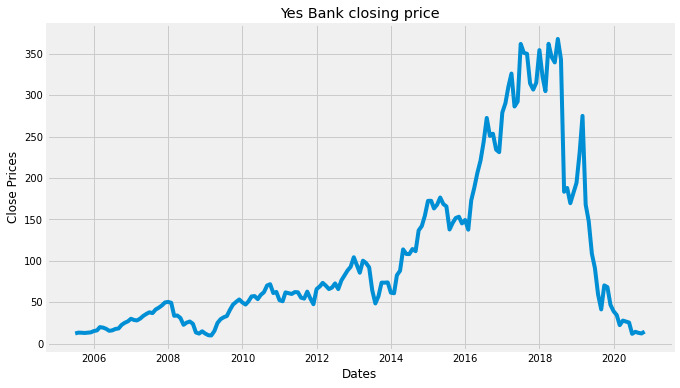

In [21]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

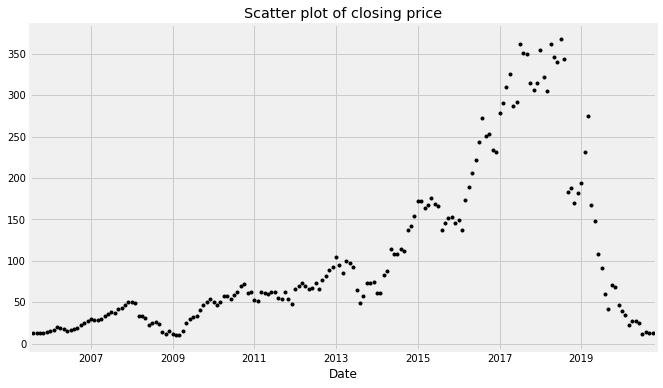

In [22]:
# Plotting Scatter plot of close price
plt.figure(figsize=(10,6))
df['Close'].plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

As seen in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.

In [23]:
# Distribution of Data 
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


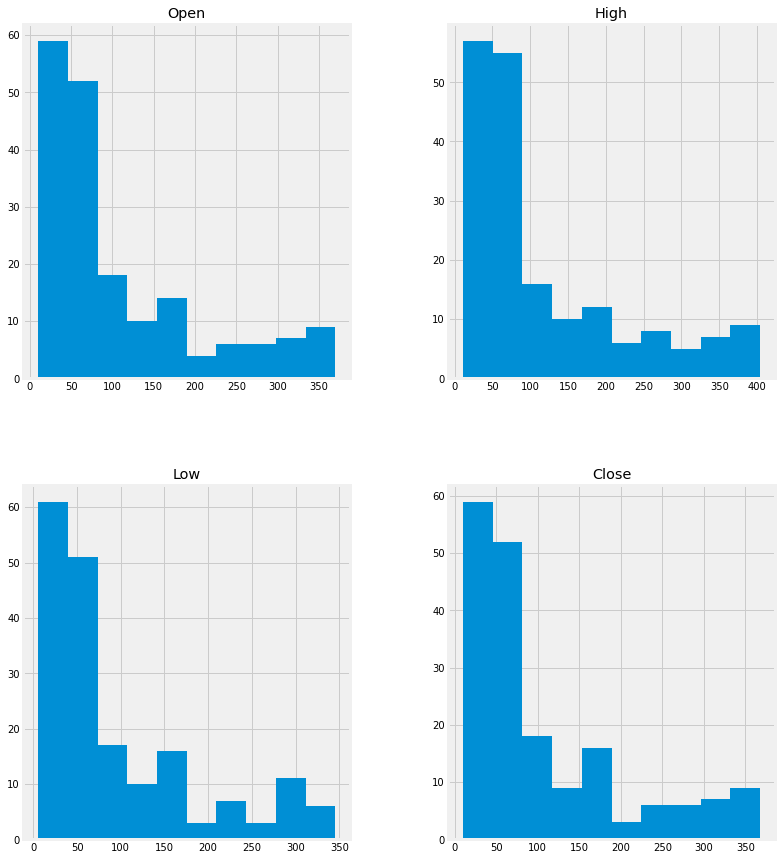

In [24]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

**Let's see the Correlation between the variables**

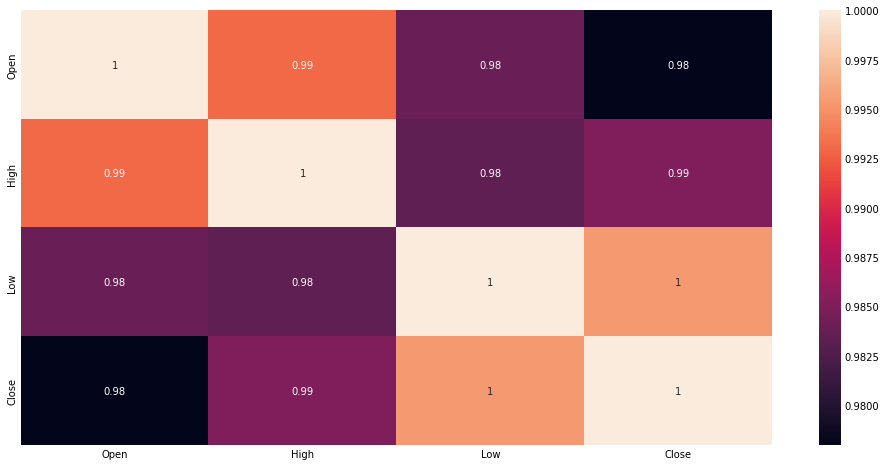

In [25]:
# plotting correlation plot
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

Here, all variables shows the highest correlation among them .